In [67]:
# 1. Import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## the pollutant categories is much fewer than the original (n=15) because in the last step, I only include pollutants which has larger than 30 sample sizes. 
national_pollutants = pd.read_csv("pollutant_export_raw.csv") 

In [4]:
national_pollutants.head()

,NAME10,Phosphorous Total as P (mg/L),Zinc Total (ug/L),Lead Total After 1984 (ug/L),TSS (mg/L),Copper Total (ug/L),Nitrogen Kjeldahl Total (mg/L),BOD5 as O2 (mg/L),TDS_mg/L,Cadmium Total (ug/L),pH,N02+NO3 (mg/L as N),Nickel Total (ug/L),COD as O2 (mg/L),Chromium Total (ug/L),Fecal Coliform (colonies/100 mL)
0,"Aberdeen--Bel Air South--Bel Air North, MD",60,67,67,60,67,60,60,0,67,55,60,9,0,9,37
1,"Atlanta, GA",210,206,201,193,207,205,192,171,175,142,200,0,205,7,149
2,"Baltimore, MD",406,405,399,403,402,405,381,1,391,150,406,49,0,60,235
3,"Birmingham, AL",73,139,139,139,139,138,136,139,0,137,0,1,42,1,1
4,"Boise City, ID",23,22,23,24,23,21,21,21,23,17,4,23,24,7,14


In [8]:
pollutants=list(national_pollutants)[1:]
pollutants

['Phosphorous Total as P (mg/L)',
 'Zinc Total (ug/L)',
 'Lead Total After 1984 (ug/L)',
 'TSS (mg/L)',
 'Copper Total (ug/L)',
 'Nitrogen Kjeldahl Total (mg/L)',
 'BOD5 as O2 (mg/L)',
 'TDS_mg/L',
 'Cadmium Total (ug/L)',
 'pH',
 'N02+NO3 (mg/L as N)',
 'Nickel Total (ug/L)',
 'COD as O2 (mg/L)',
 'Chromium Total (ug/L)',
 'Fecal Coliform (colonies/100 mL)']

In [14]:
national_pollutants_n=national_pollutants[pollutants].astype(bool).sum(axis=0)
national_pollutants_n

Phosphorous Total as P (mg/L)       46
Zinc Total (ug/L)                   45
Lead Total After 1984 (ug/L)        45
TSS (mg/L)                          44
Copper Total (ug/L)                 44
Nitrogen Kjeldahl Total (mg/L)      41
BOD5 as O2 (mg/L)                   37
TDS_mg/L                            37
Cadmium Total (ug/L)                36
pH                                  34
N02+NO3 (mg/L as N)                 33
Nickel Total (ug/L)                 31
COD as O2 (mg/L)                    31
Chromium Total (ug/L)               31
Fecal Coliform (colonies/100 mL)    30
dtype: int64

In [28]:
pollutants_sort=national_pollutants_n.to_frame().index
pollutants_sort

Index(['Phosphorous Total as P (mg/L)', 'Zinc Total (ug/L)',
       'Lead Total After 1984 (ug/L)', 'TSS (mg/L)', 'Copper Total (ug/L)',
       'Nitrogen Kjeldahl Total (mg/L)', 'BOD5 as O2 (mg/L)', 'TDS_mg/L',
       'Cadmium Total (ug/L)', 'pH', 'N02+NO3 (mg/L as N)',
       'Nickel Total (ug/L)', 'COD as O2 (mg/L)', 'Chromium Total (ug/L)',
       'Fecal Coliform (colonies/100 mL)'],
      dtype='object')

In [64]:
## function to extract new data with alll the pollutants of interest

def getNcity(Npollutants):
    pollutants_of_interest=list(pollutants_sort[:Npollutants])
    data_temp=national_pollutants[['NAME10']+ pollutants_of_interest]
    data_temp_nonzero=data_temp.replace(0,pd.np.nan).dropna(axis=0,how='any').reset_index().drop(['index'],axis=1)
    Ncity=len(data_temp_nonzero)
    return Ncity

In [80]:
Npollutants_list=range(1,len(pollutants_sort)+1)
Ncity_list=[getNcity(i) for i in Npollutants_list]

Text(0,0.5,'Number of cities with all the pollutants included')

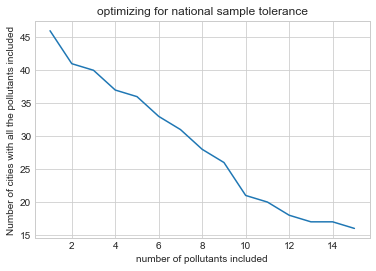

In [96]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

ax.plot(Npollutants_list,Ncity_list)

plt.title('optimizing for national sample tolerance')
plt.xlabel('number of pollutants included')
plt.ylabel('Number of cities with all the pollutants included')

In [101]:
## the above curve is relatevily smooth, indicating that decision should be made on which pollutants we are interested in
pollutants_dict={'Ncity':Ncity_list,'pollutants_added':pollutants_sort,'Npollutants':Npollutants_list}
pollutants_ncity=pd.DataFrame(pollutants_dict)
pollutants_ncity

,Ncity,Npollutants,pollutants_added
0,46,1,Phosphorous Total as P (mg/L)
1,41,2,Zinc Total (ug/L)
2,40,3,Lead Total After 1984 (ug/L)
3,37,4,TSS (mg/L)
4,36,5,Copper Total (ug/L)
5,33,6,Nitrogen Kjeldahl Total (mg/L)
6,31,7,BOD5 as O2 (mg/L)
7,28,8,TDS_mg/L
8,26,9,Cadmium Total (ug/L)
9,21,10,pH


In [102]:
pollutants_ncity.to_csv("pollutants_ncity.csv")